## 前言


Pandas 是一个Python语言实现的，开源，易于使用的数据架构以及数据分析工具。在Pandas中主要有两种数据类型，可以简单的理解为：

- Series：一维数组(列表)
- DateFrame：二维数组（矩阵）

在线实验：[Pandas完全指南.ipynb](https://nbviewer.jupyter.org/github/cyub/code-examples/blob/master/jupyter-notes/Pandas%E5%AE%8C%E5%85%A8%E6%8C%87%E5%8D%97.ipynb#)

学习资料：

- [Pandas中文文档](https://www.pypandas.cn/docs/)
- [利用Python进行数据分析·第2版](https://github.com/iamseancheney/python_for_data_analysis_2nd_chinese_version)

## 导入pandas

In [1]:
# 安装pandas,matplotlib(绘图用) 包
!pip install pandas matplotlib

In [2]:
# 导入包
import pandas as pd
import numpy as np
from IPython.display import Image

## 创建列表

### 创建普通列表

In [3]:
s = pd.Series([1, 3, 6, np.nan, 23, 3]) # type(s) === 'pandas.core.series.Series'

### 创建时间列表

In [4]:
dates = pd.date_range('20200101', periods=6)

## 创建矩阵

### 根据列表（Series）创建矩阵

In [5]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=['a', 'b', 'c', 'd'])

In [6]:
df

,a,b,c,d
2020-01-01,2.078888,-0.959554,-0.367265,1.108948
2020-01-02,-0.412362,0.232540,-1.903134,-1.831848
2020-01-03,-1.898721,0.919976,0.485630,0.758721
2020-01-04,0.486961,0.378323,0.186727,0.671816
2020-01-05,0.702523,-0.556798,0.635000,-0.118564
2020-01-06,0.654506,-0.000727,0.417828,-0.611751


In [7]:
df2 = pd.DataFrame({
  'a':pd.Series([1, 2, 3, 4]),
  'b':pd.Timestamp('20180708'),
  'c':pd.Categorical(['cate1', 'cate2', 'cate3', 'cate4'])
})

In [8]:
df2

,a,b,c
0,1,2018-07-08,cate1
1,2,2018-07-08,cate2
2,3,2018-07-08,cate3
3,4,2018-07-08,cate4


### 根据字典创建矩阵

In [9]:
data = {'name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy', 'Jack', 'Tim'], 
        'age': [20, 32, 36, 24, 23, 18, 27], 
        'gender': np.random.choice(['M','F'],size=7),
        'score': [25, 94, 57, 62, 70, 88, 67],
        'country': np.random.choice(['US','CN'],size=7),
        }
df3 = pd.DataFrame(data, columns = ['name', 'age', 'gender', 'score', 'country'])

In [10]:
df3

,name,age,gender,score,country
0,Jason,20,F,25,US
1,Molly,32,F,94,CN
2,Tina,36,F,57,CN
3,Jake,24,F,62,US
4,Amy,23,F,70,CN
5,Jack,18,F,88,US
6,Tim,27,F,67,CN


## 矩阵属性、检视数据

### 行数列数

In [11]:
df.shape

(6, 4)

### 索引

In [12]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06'],
              dtype='datetime64[ns]', freq='D')

### 列名

In [13]:
df.columns

Index(['a', 'b', 'c', 'd'], dtype='object')

### 值

In [14]:
df.values

array([[ 2.07888761e+00, -9.59553787e-01, -3.67264810e-01,
         1.10894771e+00],
       [-4.12361501e-01,  2.32539690e-01, -1.90313388e+00,
        -1.83184759e+00],
       [-1.89872061e+00,  9.19975617e-01,  4.85630402e-01,
         7.58720982e-01],
       [ 4.86960560e-01,  3.78322949e-01,  1.86726767e-01,
         6.71815555e-01],
       [ 7.02523492e-01, -5.56797752e-01,  6.35000384e-01,
        -1.18564302e-01],
       [ 6.54506255e-01, -7.26685067e-04,  4.17828341e-01,
        -6.11751157e-01]])

### 矩阵信息

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2020-01-01 to 2020-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       6 non-null      float64
 1   b       6 non-null      float64
 2   c       6 non-null      float64
 3   d       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


### 矩阵描述信息

In [16]:
df.describe()

,a,b,c,d
count,6.000000,6.000000,6.000000,6.000000
mean,0.268633,0.002293,-0.090869,-0.003780
std,1.328384,0.674432,0.954544,1.095503
min,-1.898721,-0.959554,-1.903134,-1.831848
25%,-0.187531,-0.417780,-0.228767,-0.488454
50%,0.570733,0.115907,0.302278,0.276626
75%,0.690519,0.341877,0.468680,0.736995
max,2.078888,0.919976,0.635000,1.108948


In [17]:
### 更改索引
df.index = pd.date_range('2020/06/01', periods=df.shape[0])

df

,a,b,c,d
2020-06-01,2.078888,-0.959554,-0.367265,1.108948
2020-06-02,-0.412362,0.232540,-1.903134,-1.831848
2020-06-03,-1.898721,0.919976,0.485630,0.758721
2020-06-04,0.486961,0.378323,0.186727,0.671816
2020-06-05,0.702523,-0.556798,0.635000,-0.118564
2020-06-06,0.654506,-0.000727,0.417828,-0.611751


### top5 数据

In [18]:
df.head(1)

,a,b,c,d
2020-06-01,2.078888,-0.959554,-0.367265,1.108948


### tail5 数据

In [19]:
df.tail(5)

,a,b,c,d
2020-06-02,-0.412362,0.232540,-1.903134,-1.831848
2020-06-03,-1.898721,0.919976,0.485630,0.758721
2020-06-04,0.486961,0.378323,0.186727,0.671816
2020-06-05,0.702523,-0.556798,0.635000,-0.118564
2020-06-06,0.654506,-0.000727,0.417828,-0.611751


### 某一列值统计

In [20]:
df['a'].value_counts(dropna=False)

-1.898721    1
 0.702523    1
 2.078888    1
 0.486961    1
 0.654506    1
-0.412362    1
Name: a, dtype: int64

### 查看每一列唯一值统计

In [21]:
df.apply(pd.Series.value_counts)

,a,b,c,d
-1.903134,NaN,NaN,1.0,NaN
-1.898721,1.0,NaN,NaN,NaN
-1.831848,NaN,NaN,NaN,1.0
-0.959554,NaN,1.0,NaN,NaN
-0.611751,NaN,NaN,NaN,1.0
-0.556798,NaN,1.0,NaN,NaN
-0.412362,1.0,NaN,NaN,NaN
-0.367265,NaN,NaN,1.0,NaN
-0.118564,NaN,NaN,NaN,1.0
-0.000727,NaN,1.0,NaN,NaN


## 排序

### 根据索引(index)排序

In [22]:
# sort_index(axis=, ascending=)
# axis：0-行排序，1-列排序; ascending：True-升序，False-降序
df.sort_index(axis=0, ascending=False)

,a,b,c,d
2020-06-06,0.654506,-0.000727,0.417828,-0.611751
2020-06-05,0.702523,-0.556798,0.635000,-0.118564
2020-06-04,0.486961,0.378323,0.186727,0.671816
2020-06-03,-1.898721,0.919976,0.485630,0.758721
2020-06-02,-0.412362,0.232540,-1.903134,-1.831848
2020-06-01,2.078888,-0.959554,-0.367265,1.108948


In [23]:
df.sort_index(axis=1, ascending=False)

,d,c,b,a
2020-06-01,1.108948,-0.367265,-0.959554,2.078888
2020-06-02,-1.831848,-1.903134,0.232540,-0.412362
2020-06-03,0.758721,0.485630,0.919976,-1.898721
2020-06-04,0.671816,0.186727,0.378323,0.486961
2020-06-05,-0.118564,0.635000,-0.556798,0.702523
2020-06-06,-0.611751,0.417828,-0.000727,0.654506


### 根据值排序

In [24]:
df.sort_values(by='a', ascending=False)

,a,b,c,d
2020-06-01,2.078888,-0.959554,-0.367265,1.108948
2020-06-05,0.702523,-0.556798,0.635000,-0.118564
2020-06-06,0.654506,-0.000727,0.417828,-0.611751
2020-06-04,0.486961,0.378323,0.186727,0.671816
2020-06-02,-0.412362,0.232540,-1.903134,-1.831848
2020-06-03,-1.898721,0.919976,0.485630,0.758721


In [25]:
df.sort_values(by=['a','b'], ascending=True)

,a,b,c,d
2020-06-03,-1.898721,0.919976,0.485630,0.758721
2020-06-02,-0.412362,0.232540,-1.903134,-1.831848
2020-06-04,0.486961,0.378323,0.186727,0.671816
2020-06-06,0.654506,-0.000727,0.417828,-0.611751
2020-06-05,0.702523,-0.556798,0.635000,-0.118564
2020-06-01,2.078888,-0.959554,-0.367265,1.108948


## 选取数据

### 选取某一列

In [26]:
df['a'] # 等效于df.a

2020-06-01    2.078888
2020-06-02   -0.412362
2020-06-03   -1.898721
2020-06-04    0.486961
2020-06-05    0.702523
2020-06-06    0.654506
Freq: D, Name: a, dtype: float64

### 根据索引选取某几行数据

In [27]:
df['2020-06-01':'2020-06-02'] # 选取索引以2020-06-01开始，到2020-06-02结束的数据

,a,b,c,d
2020-06-01,2.078888,-0.959554,-0.367265,1.108948
2020-06-02,-0.412362,0.232540,-1.903134,-1.831848


### 根据列名选择某几列数据

In [28]:
df[['c', 'b']]

,c,b
2020-06-01,-0.367265,-0.959554
2020-06-02,-1.903134,0.232540
2020-06-03,0.485630,0.919976
2020-06-04,0.186727,0.378323
2020-06-05,0.635000,-0.556798
2020-06-06,0.417828,-0.000727


### 根据索引和列名选择数据

loc[行名选择, 列名选择]，未指定行名或列名，或者指定为:则表示选择当前所有行，或列

In [29]:
df.loc['2020-06-01']

a    2.078888
b   -0.959554
c   -0.367265
d    1.108948
Name: 2020-06-01 00:00:00, dtype: float64

In [30]:
df.loc['2020-06-01', 'b']

-0.9595537865841992

In [31]:
df.loc[:, 'b'] # type(df.loc[:, 'b']) === 'pandas.core.series.Series'，而type(df.loc[:, ['b']]) === ’pandas.core.frame.DataFrame‘

2020-06-01   -0.959554
2020-06-02    0.232540
2020-06-03    0.919976
2020-06-04    0.378323
2020-06-05   -0.556798
2020-06-06   -0.000727
Freq: D, Name: b, dtype: float64

In [32]:
df.loc[:, ['a', 'b']]

,a,b
2020-06-01,2.078888,-0.959554
2020-06-02,-0.412362,0.232540
2020-06-03,-1.898721,0.919976
2020-06-04,0.486961,0.378323
2020-06-05,0.702523,-0.556798
2020-06-06,0.654506,-0.000727


### 根据行索引和列索引取数据

In [33]:
df.iloc[0,0] # === df.loc['2020-06-01', 'a']

2.0788876064798893

In [34]:
df.iloc[0, :] # ==== df.loc['2020-06-01', :]

a    2.078888
b   -0.959554
c   -0.367265
d    1.108948
Name: 2020-06-01 00:00:00, dtype: float64

### 根据布尔表达式表达式取数据

只有当布尔表达式为真时的数据才会被选择

In [35]:
df[df.a > 1]

,a,b,c,d
2020-06-01,2.078888,-0.959554,-0.367265,1.108948


In [36]:
df[(df['a'] > 1) & (df['d'] <0)]

,a,b,c,d


## 添加/删除列、更新、替换数据

### 设置某矩阵项值

In [37]:
df.loc['2020-06-01', 'a'] = np.nan
df.loc['2020-06-06', 'c'] = np.nan

In [38]:
df

,a,b,c,d
2020-06-01,NaN,-0.959554,-0.367265,1.108948
2020-06-02,-0.412362,0.232540,-1.903134,-1.831848
2020-06-03,-1.898721,0.919976,0.485630,0.758721
2020-06-04,0.486961,0.378323,0.186727,0.671816
2020-06-05,0.702523,-0.556798,0.635000,-0.118564
2020-06-06,0.654506,-0.000727,NaN,-0.611751


### 根据条件创建新列

In [39]:
df['e'] = np.where((df['a'] > 1) & (df['d']<0), 1, 0)

In [40]:
df

,a,b,c,d,e
2020-06-01,NaN,-0.959554,-0.367265,1.108948,0
2020-06-02,-0.412362,0.232540,-1.903134,-1.831848,0
2020-06-03,-1.898721,0.919976,0.485630,0.758721,0
2020-06-04,0.486961,0.378323,0.186727,0.671816,0
2020-06-05,0.702523,-0.556798,0.635000,-0.118564,0
2020-06-06,0.654506,-0.000727,NaN,-0.611751,0


### 根据已有列创建新列

In [41]:
tmp = df.copy()
df.loc[:,'f'] = tmp.apply(lambda row: row['b']+ row['d'], axis=1)

In [42]:
df

,a,b,c,d,e,f
2020-06-01,NaN,-0.959554,-0.367265,1.108948,0,0.149394
2020-06-02,-0.412362,0.232540,-1.903134,-1.831848,0,-1.599308
2020-06-03,-1.898721,0.919976,0.485630,0.758721,0,1.678697
2020-06-04,0.486961,0.378323,0.186727,0.671816,0,1.050139
2020-06-05,0.702523,-0.556798,0.635000,-0.118564,0,-0.675362
2020-06-06,0.654506,-0.000727,NaN,-0.611751,0,-0.612478


### 替换数据

In [43]:
# 将所有等于1的值替换成20
df.replace(1,20)

,a,b,c,d,e,f
2020-06-01,NaN,-0.959554,-0.367265,1.108948,0,0.149394
2020-06-02,-0.412362,0.232540,-1.903134,-1.831848,0,-1.599308
2020-06-03,-1.898721,0.919976,0.485630,0.758721,0,1.678697
2020-06-04,0.486961,0.378323,0.186727,0.671816,0,1.050139
2020-06-05,0.702523,-0.556798,0.635000,-0.118564,0,-0.675362
2020-06-06,0.654506,-0.000727,NaN,-0.611751,0,-0.612478


In [44]:
# 使用one替换1，three替换3
df.replace([1,3],['one','three'])

,a,b,c,d,e,f
2020-06-01,NaN,-0.959554,-0.367265,1.108948,0,0.149394
2020-06-02,-0.412362,0.232540,-1.903134,-1.831848,0,-1.599308
2020-06-03,-1.898721,0.919976,0.485630,0.758721,0,1.678697
2020-06-04,0.486961,0.378323,0.186727,0.671816,0,1.050139
2020-06-05,0.702523,-0.556798,0.635000,-0.118564,0,-0.675362
2020-06-06,0.654506,-0.000727,NaN,-0.611751,0,-0.612478


### 列名重命名

In [45]:
df.rename(columns={'c':'cc'})

,a,b,cc,d,e,f
2020-06-01,NaN,-0.959554,-0.367265,1.108948,0,0.149394
2020-06-02,-0.412362,0.232540,-1.903134,-1.831848,0,-1.599308
2020-06-03,-1.898721,0.919976,0.485630,0.758721,0,1.678697
2020-06-04,0.486961,0.378323,0.186727,0.671816,0,1.050139
2020-06-05,0.702523,-0.556798,0.635000,-0.118564,0,-0.675362
2020-06-06,0.654506,-0.000727,NaN,-0.611751,0,-0.612478


### 重设索引

In [46]:
# 将a设置为索引
df.set_index('a')

,b,c,d,e,f
a,,,,,
NaN,-0.959554,-0.367265,1.108948,0,0.149394
-0.412362,0.232540,-1.903134,-1.831848,0,-1.599308
-1.898721,0.919976,0.485630,0.758721,0,1.678697
0.486961,0.378323,0.186727,0.671816,0,1.050139
0.702523,-0.556798,0.635000,-0.118564,0,-0.675362
0.654506,-0.000727,NaN,-0.611751,0,-0.612478


### 删除列

In [47]:
df.drop(columns=['a', 'f'])

,b,c,d,e
2020-06-01,-0.959554,-0.367265,1.108948,0
2020-06-02,0.232540,-1.903134,-1.831848,0
2020-06-03,0.919976,0.485630,0.758721,0
2020-06-04,0.378323,0.186727,0.671816,0
2020-06-05,-0.556798,0.635000,-0.118564,0
2020-06-06,-0.000727,NaN,-0.611751,0


### 处理Nan数据

### 检查是否Nan值

In [48]:
df.isnull()

,a,b,c,d,e,f
2020-06-01,True,False,False,False,False,False
2020-06-02,False,False,False,False,False,False
2020-06-03,False,False,False,False,False,False
2020-06-04,False,False,False,False,False,False
2020-06-05,False,False,False,False,False,False
2020-06-06,False,False,True,False,False,False


In [49]:
df.notnull() # df.isnull()反操作

,a,b,c,d,e,f
2020-06-01,False,True,True,True,True,True
2020-06-02,True,True,True,True,True,True
2020-06-03,True,True,True,True,True,True
2020-06-04,True,True,True,True,True,True
2020-06-05,True,True,True,True,True,True
2020-06-06,True,True,False,True,True,True


### 删除掉包含null值的行

In [50]:
### dropna(axis=, how=)：丢弃NaN数据，
# axis：0-按行丢弃)，1-按列丢弃; how：'any'-只要含有NaN数据就丢弃，'all'-所有数据都为NaN时丢弃

df.dropna(axis=0)

,a,b,c,d,e,f
2020-06-02,-0.412362,0.232540,-1.903134,-1.831848,0,-1.599308
2020-06-03,-1.898721,0.919976,0.485630,0.758721,0,1.678697
2020-06-04,0.486961,0.378323,0.186727,0.671816,0,1.050139
2020-06-05,0.702523,-0.556798,0.635000,-0.118564,0,-0.675362


### 替换Nan

In [51]:
#### 使用1000替换Nan
df.fillna(1000)

,a,b,c,d,e,f
2020-06-01,1000.000000,-0.959554,-0.367265,1.108948,0,0.149394
2020-06-02,-0.412362,0.232540,-1.903134,-1.831848,0,-1.599308
2020-06-03,-1.898721,0.919976,0.485630,0.758721,0,1.678697
2020-06-04,0.486961,0.378323,0.186727,0.671816,0,1.050139
2020-06-05,0.702523,-0.556798,0.635000,-0.118564,0,-0.675362
2020-06-06,0.654506,-0.000727,1000.000000,-0.611751,0,-0.612478


In [52]:
# 使用平均值替换所有null值
df.fillna(df.mean())

,a,b,c,d,e,f
2020-06-01,-0.093418,-0.959554,-0.367265,1.108948,0,0.149394
2020-06-02,-0.412362,0.232540,-1.903134,-1.831848,0,-1.599308
2020-06-03,-1.898721,0.919976,0.485630,0.758721,0,1.678697
2020-06-04,0.486961,0.378323,0.186727,0.671816,0,1.050139
2020-06-05,0.702523,-0.556798,0.635000,-0.118564,0,-0.675362
2020-06-06,0.654506,-0.000727,-0.192608,-0.611751,0,-0.612478


## 聚合、分组、统计

### 返回每一列的平均数

In [53]:
df.mean()

a   -0.093418
b    0.002293
c   -0.192608
d   -0.003780
e    0.000000
f   -0.001486
dtype: float64

### 返回列之间的相关性

In [54]:
df.corr()

,a,b,c,d,e,f
a,1.000000,-0.821088,0.055410,-0.201634,NaN,-0.486299
b,-0.821088,1.000000,0.024617,-0.127603,NaN,0.441503
c,0.055410,0.024617,1.000000,0.743462,NaN,0.682118
d,-0.201634,-0.127603,0.743462,1.000000,NaN,0.833588
e,NaN,NaN,NaN,NaN,NaN,NaN
f,-0.486299,0.441503,0.682118,0.833588,NaN,1.000000


### 返回每一列中非null值数量

In [55]:
df.count()

a    5
b    6
c    5
d    6
e    6
f    6
dtype: int64

### 返回每一列中最大值

In [56]:
df.max()

a    0.702523
b    0.919976
c    0.635000
d    1.108948
e    0.000000
f    1.678697
dtype: float64

### 返回每一列中最小值

In [57]:
df.min()

a   -1.898721
b   -0.959554
c   -1.903134
d   -1.831848
e    0.000000
f   -1.599308
dtype: float64

### 返回每一列的中值

In [58]:
df.median()

a    0.486961
b    0.115907
c    0.186727
d    0.276626
e    0.000000
f   -0.231542
dtype: float64

### 返回每一列的标准偏差

In [59]:
df.std()

a    1.105735
b    0.674432
c    1.030199
d    1.095503
e    0.000000
f    1.210962
dtype: float64

### 分组后取TopN

In [60]:
### 取每个国家下，分值前二的记录

# 先排序
df4 = df3.sort_values(['country','score'],ascending=[1, 0],inplace=False)
df4

,name,age,gender,score,country
1,Molly,32,F,94,CN
4,Amy,23,F,70,CN
6,Tim,27,F,67,CN
2,Tina,36,F,57,CN
5,Jack,18,F,88,US
3,Jake,24,F,62,US
0,Jason,20,F,25,US


In [61]:
# 取值
df4.groupby(['country']).head(2)

,name,age,gender,score,country
1,Molly,32,F,94,CN
4,Amy,23,F,70,CN
5,Jack,18,F,88,US
3,Jake,24,F,62,US


### 多重分组后取TopN

In [62]:
### 取每个国家下，分值前二的记录

# 先排序
df5 = df3.sort_values(['country','gender', 'score'],ascending=[1, 0, 0],inplace=False)
df5

,name,age,gender,score,country
1,Molly,32,F,94,CN
4,Amy,23,F,70,CN
6,Tim,27,F,67,CN
2,Tina,36,F,57,CN
5,Jack,18,F,88,US
3,Jake,24,F,62,US
0,Jason,20,F,25,US


In [63]:
df5 = df5.groupby(['country', 'gender']).head(1) # 注意此处取1
df5

,name,age,gender,score,country
1,Molly,32,F,94,CN
5,Jack,18,F,88,US


In [64]:
df5.groupby(['country']).head(2)

,name,age,gender,score,country
1,Molly,32,F,94,CN
5,Jack,18,F,88,US


### 分组之后取平均值

In [65]:
scoreMean = df3.groupby(['gender'])['score'].mean()
scoreMean = pd.DataFrame(scoreMean) # 等效于socreMean = scoreMean.to_frame()
scoreMean

,score
gender,
F,66.142857


In [66]:
#### 合并
df3.merge(scoreMean,left_on='gender',right_index=True)

,name,age,gender,score_x,country,score_y
0,Jason,20,F,25,US,66.142857
1,Molly,32,F,94,CN,66.142857
2,Tina,36,F,57,CN,66.142857
3,Jake,24,F,62,US,66.142857
4,Amy,23,F,70,CN,66.142857
5,Jack,18,F,88,US,66.142857
6,Tim,27,F,67,CN,66.142857


In [67]:
df3

,name,age,gender,score,country
0,Jason,20,F,25,US
1,Molly,32,F,94,CN
2,Tina,36,F,57,CN
3,Jake,24,F,62,US
4,Amy,23,F,70,CN
5,Jack,18,F,88,US
6,Tim,27,F,67,CN


### 分组之后计数

In [68]:
df3.groupby(['country'])['gender'].count().to_frame()

,gender
country,
CN,4
US,3


In [69]:
### 按性别统计每个国家的人数

df3.groupby(['country', 'gender'])['gender'].count().to_frame()

,,gender
country,gender,
CN,F,4
US,F,3


### 分组后唯一值统计

In [70]:
df3.groupby(['country'])['gender'].nunique().to_frame()

,gender
country,
CN,1
US,1


### 分组后求和

In [71]:
# 默认是所有数值类型列求和
df3.groupby('country').sum() 

,age,score
country,,
CN,118,288
US,62,175


In [72]:
# 指定列求和
df3.groupby('country')['score'].sum() # 等效于df3.groupby(['country'])['score'].apply(np.sum)

country
CN    288
US    175
Name: score, dtype: int64

In [73]:
# 分组后指定列求和（其他聚合也类似)可以理解成Split, apply, combine
Image(url="http://static.cyub.vip/images/202001/pandas.split-apply-combine.png")

In [74]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

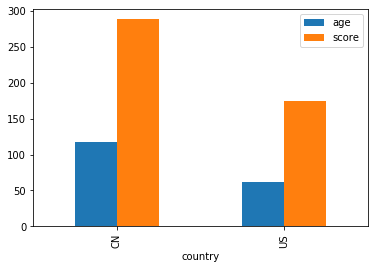

In [75]:
plt.clf()
df3.groupby('country').sum().plot(kind='bar')
plt.show()

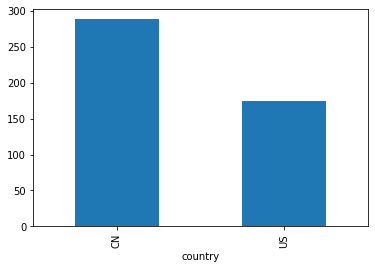

In [76]:
df3.groupby('country')['score'].sum().plot(kind='bar')

### 分组后求平均值，最大值，最小值

In [77]:
df3.groupby('country').agg({'score':['min','max','mean']})

score               
          min max       mean
country                     
CN         57  94  72.000000
US         25  88  58.333333

In [78]:
# 跟上面效果一致
df3.groupby('country')['score'].agg([np.min, np.max, np.mean])

,amin,amax,mean
country,,,
CN,57,94,72.000000
US,25,88,58.333333


### 分组后不同列使用不同求值函数

In [79]:
df3.groupby('country').agg({'score': ['max','min', 'std'],
                        'age': ['sum', 'count', 'max']})

score                 age          
          max min        std  sum count max
country                                    
CN         94  57  15.684387  118     4  36
US         88  25  31.659648   62     3  24

### 多个分组结果拼接

In [80]:
t1=df3.groupby('country')['score'].mean().to_frame()
t2 = df3.groupby('country')['age'].sum().to_frame()

t1.merge(t2,left_index=True,right_index=True)

,score,age
country,,
CN,72.000000,118
US,58.333333,62


### 遍历分组

In [81]:
grouped = df3.groupby('country')
for name,group in grouped:
    print(name)
    print(group)

CN
    name  age gender  score country
1  Molly   32      F     94      CN
2   Tina   36      F     57      CN
4    Amy   23      F     70      CN
6    Tim   27      F     67      CN
US
    name  age gender  score country
0  Jason   20      F     25      US
3   Jake   24      F     62      US
5   Jack   18      F     88      US


In [82]:
grouped = df3.groupby(['country', 'gender'])
for name,group in grouped:
    print(name)
    print(group)

('CN', 'F')
    name  age gender  score country
1  Molly   32      F     94      CN
2   Tina   36      F     57      CN
4    Amy   23      F     70      CN
6    Tim   27      F     67      CN
('US', 'F')
    name  age gender  score country
0  Jason   20      F     25      US
3   Jake   24      F     62      US
5   Jack   18      F     88      US


### 获取分组信息

In [83]:
df3.groupby('country').groups

{'CN': Int64Index([1, 2, 4, 6], dtype='int64'),
 'US': Int64Index([0, 3, 5], dtype='int64')}

### 取分组后的某一组

In [84]:
df3.groupby('country').get_group('CN')

,name,age,gender,score,country
1,Molly,32,F,94,CN
2,Tina,36,F,57,CN
4,Amy,23,F,70,CN
6,Tim,27,F,67,CN


### 分组后过滤

In [85]:
df3.groupby('name').filter(lambda x: len(x) >= 3)

,name,age,gender,score,country


## 数据透视

In [86]:
# 数据透视的值项只能是数值类型
# pivot(index =,columns=,values=)：透视数据
# index：透视的列（作为索引, 且值都是唯一的）; columns-用于进一步细分index；values查看具体值

df3.pivot(index ='name',columns='gender',values=['score','age'])

,score,age
gender,F,F
name,,
Amy,70,23
Jack,88,18
Jake,62,24
Jason,25,20
Molly,94,32
Tim,67,27
Tina,57,36


In [87]:
# pivot_table(index =,columns=,values=)：透视数据
# index：透视的列（作为索引, 且值都是唯一的）; columns-用于进一步细分index；values查看具体值；fill_value:0-用0替换Nan; margins:True-汇总

pd.pivot_table(df3,index=['country', 'gender'], values=['score'],aggfunc=np.sum)

,,score
country,gender,
CN,F,288
US,F,175


In [88]:
pd.pivot_table(df3,index=['country', 'gender'], values=['score', 'age'],aggfunc=[np.sum, np.mean],fill_value=0,margins=True)

sum             mean           
                age score        age      score
country gender                                 
CN      F       118   288  29.500000  72.000000
US      F        62   175  20.666667  58.333333
All             180   463  25.714286  66.142857

In [89]:
df3

,name,age,gender,score,country
0,Jason,20,F,25,US
1,Molly,32,F,94,CN
2,Tina,36,F,57,CN
3,Jake,24,F,62,US
4,Amy,23,F,70,CN
5,Jack,18,F,88,US
6,Tim,27,F,67,CN


## 合并、连接、拼接（Merge, join, and concatenate）

### 拼接(concatenate)

In [90]:
t1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
    'B': ['B0', 'B1', 'B2', 'B3'],
    'C': ['C0', 'C1', 'C2', 'C3'],
    'D': ['D0', 'D1', 'D2', 'D3']},
    index=[0, 1, 2, 3])
print('-----t1----')
display(t1)

t2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
    'B': ['B4', 'B5', 'B6', 'B7'],
    'C': ['C4', 'C5', 'C6', 'C7'],
    'D': ['D4', 'D5', 'D6', 'D7']},
    index=[4, 5, 6, 7])

print('----t2-----')
display(t2)

t3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
    'B': ['B8', 'B9', 'B10', 'B11'],
    'C': ['C8', 'C9', 'C10', 'C11'],
    'D': ['D8', 'D9', 'D10', 'D11']},
    index=[8, 9, 10, 11])

print('-----t3----')
print(t2)
frames = [t1, t2, t3]

pd.concat(frames)

-----t1----


,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


----t2-----


,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


-----t3----
    A   B   C   D
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7


,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [91]:
# concat类似：linux的split命令把文件分成多个，然后在拼接成一个完成文件

Image(url="http://static.cyub.vip/images/202001/pandas.concat.png")

In [92]:
t4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
    'D': ['D2', 'D3', 'D6', 'D7'],
    'F': ['F2', 'F3', 'F6', 'F7']},
    index=[2, 3, 6, 7])

print('-----t4----')

pd.concat([t1, t4], axis=1, sort=False) # 此时相当于out joiner

-----t4----


,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [93]:
Image(url="http://static.cyub.vip/images/202001/pandas.concat.outer_join.png")

In [94]:
pd.concat([t1, t4], axis=1, join='inner')

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [95]:
Image(url="http://static.cyub.vip/images/202001/pandas.concat.inner_join.png")

In [96]:
t1.append([t2,t3]) # 相当于pd.concat([t1, t2, t3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


### 连接（Join）

join(on=None, how='left', lsuffix='', rsuffix='', sort=False)

on:join的键，默认是矩阵的index, how:join方式，left-相当于左连接,outer,inner

更多查看[Database-style DataFrame or named Series joining/merging](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#database-style-dataframe-or-named-series-joining-merging)

[Combining Datasets: Merge and Join](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html)

In [97]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
   'B': ['B0', 'B1', 'B2']},
   index=['K0', 'K1', 'K2'])

print('----left----')
display(left)

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
   'D': ['D0', 'D2', 'D3']},
   index=['K0', 'K2', 'K3'])
print('---right----')
display(right)

left.join(right) # 相当于 pd.merge(left, right, left_index=True, right_index=True, how='left')

----left----


,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


---right----


,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [98]:
Image(url="http://static.cyub.vip/images/202001/pandas.join.left.png")

In [99]:
left.join(right, how='outer') # 相当于pd.merge(left, right, left_index=True, right_index=True, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


In [100]:
Image(url="http://static.cyub.vip/images/202001/pandas.join.outer.png")

In [101]:
left.join(right, how='inner') #相当于pd.merge(left, right, left_index=True, right_index=True, how='inner')

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2


In [102]:
Image(url="http://static.cyub.vip/images/202001/pandas.join.inner.png")

### 根据某一列进行join

left.join(right, on=key_or_keys)= pd.merge(left, right, left_on=key_or_keys, right_index=True,
      how='left', sort=False) // 使用left矩阵的key_or_keys列与right矩阵的index进行join

In [103]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
    'B': ['B0', 'B1', 'B2', 'B3'],
     'key': ['K0', 'K1', 'K0', 'K1']})

print('----left----')
print(left)

right = pd.DataFrame({'C': ['C0', 'C1'],
    'D': ['D0', 'D1']},
    index=['K0', 'K1'])

print('----right----')
display(right)


left.join(right, on='key') # 相当于pd.merge(left, right, left_on='key', right_index=True,how='left', sort=False);

----left----
    A   B key
0  A0  B0  K0
1  A1  B1  K1
2  A2  B2  K0
3  A3  B3  K1
----right----


,C,D
K0,C0,D0
K1,C1,D1


,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K0,C0,D0
3,A3,B3,K1,C1,D1


In [104]:
Image(url="http://static.cyub.vip/images/202001/pandas.join.key.left.png")

In [105]:
#### 多列的join

left = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
    'B': ['B0', 'B1', 'B2', 'B3'],
   'key1': ['K0', 'K0', 'K1', 'K2'],
   'key2': ['K0', 'K1', 'K0', 'K1']})

print('----left----')
display(left)

index = pd.MultiIndex.from_tuples([('K0', 'K0'), ('K1', 'K0'),
    ('K2', 'K0'), ('K3', 'K11')])


right = pd.DataFrame({'C': ['C0', 'C1', 'C2', 'C3'],
    'D': ['D0', 'D1', 'D2', 'D3']},
    index=index)

print('----right----')
display(right)

left.join(right, on=['key1', 'key2'])

----left----


,A,B,key1,key2
0,A0,B0,K0,K0
1,A1,B1,K0,K1
2,A2,B2,K1,K0
3,A3,B3,K2,K1


----right----


,,C,D
K0,K0,C0,D0
K1,K0,C1,D1
K2,K0,C2,D2
K3,K11,C3,D3


,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A1,B1,K0,K1,NaN,NaN
2,A2,B2,K1,K0,C1,D1
3,A3,B3,K2,K1,NaN,NaN


In [106]:
Image(url="http://static.cyub.vip/images/202001/pandas.join.keys.left.png")

In [107]:
left.join(right, on=['key1', 'key2'], how='inner')

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
2,A2,B2,K1,K0,C1,D1


In [108]:
Image(url="http://static.cyub.vip/images/202001/pandas.join.keys.inner.png")

## 数据导入导出

### 从csv中导入数据

In [109]:
pd.read_csv('../dataset/game_daily_stats_20200127_20200202.csv', names=['id', '日期', '游戏id', '游戏名称', '国家', '国家码', '下载数', '下载用户数', '成功下载数', '成功下载用户数','安装数', '安装用户数'],na_filter = False)

,id,日期,游戏id,游戏名称,国家,国家码,下载数,下载用户数,成功下载数,成功下载用户数,安装数,安装用户数
0,7564316,2020-01-27,1,Uphill Rush Water Park Racing,俄罗斯,RU,1,1,1,1,1,1
1,7564317,2020-01-27,1,Uphill Rush Water Park Racing,肯尼亚,KE,2,2,2,2,0,0
2,7564318,2020-01-27,1,Uphill Rush Water Park Racing,刚果金,CD,1,1,0,0,0,0
3,7564319,2020-01-27,1,Uphill Rush Water Park Racing,尼泊尔,NP,1,1,0,0,0,0
4,7564320,2020-01-27,1,Uphill Rush Water Park Racing,索马里,SO,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
179886,8010481,2020-02-02,175,Soccer Star 2022 World Legend: Football game,赞比亚,ZM,2,2,0,0,0,0
179887,8010482,2020-02-02,175,Soccer Star 2022 World Legend: Football game,尼日利亚,NG,1,1,2,2,2,2
179888,8010483,2020-02-02,175,Soccer Star 2022 World Legend: Football game,埃及,EG,2,2,0,0,0,0
179889,8010484,2020-02-02,175,Soccer Star 2022 World Legend: Football game,科特迪瓦,CI,3,3,2,2,2,2


### 导出数据到csv

In [110]:
df.to_csv('/tmp/pandas.csv', encoding="utf_8_sig")